In [1]:
# add library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
import ast

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

random_state = 42
%matplotlib inline

- Những feature của line liên quan:
'before_1_gt', 'before_1_prob', 'affter_1_gt', 'affter_1_prob', 'before_2_gt', 'before_2_prob','affter_2_gt', 'affter_2_prob'

- Feature bert trực tại line đó: 'direct_2_gt', 'direct_2_prob'
- Feature kết quả của 6 tools: 'tool_flawfinder', 'tool_clang', 'tool_pvsstudio', 'tool_cppcheck','tool_framac', 'tool_infer'

In [2]:
import json
import pandas  as pd 
import os,sys,glob 

# 이미 나눈 테스트의 데이터를 읽어옴
cwe_dataset = pd.read_csv('../example_datasets/test.csv')
cwe_dataset

,File,source_code,line_error,error_type
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1]
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1]
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1]
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1]
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1]
...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0]
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0]
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119]
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0]


In [3]:
with open("../pred.json","r") as f:
  dataset_bert = json.load(f)

dataset=[]
for i in dataset_bert:
  dataset.append({'prob_lines':i['prob_lines'],'class_lines':i['class_lines']})
  
cwe_dataset['bert_info'] = dataset
cwe_dataset.line_error=cwe_dataset.line_error.map(ast.literal_eval)
cwe_dataset.error_type=cwe_dataset.error_type.map(ast.literal_eval)

In [4]:
cwe_dataset

,File,source_code,line_error,error_type,bert_info
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."


In [5]:
cwe_dataset.columns=['file','source_code','line_error','error_type','bert_info']

In [6]:
# 멀티 도구들이 진단되는 결과를 읽어옴
tools_report_ds = []
for i in glob.glob("../tools_report/*.csv"):
  print(i) # print 각 CWE
  tools_report_ds.append(pd.read_csv(i))
tools_report_ds = pd.concat(tools_report_ds,0)

../tools_report/CWE758_Undefined_Behavior_report.csv
../tools_report/CWE457_Use_of_Uninitialized_Variable_report.csv
../tools_report/CWE475_Undefined_Behavior_for_Input_to_API_report.csv
../tools_report/CWE761_Free_Pointer_Not_at_Start_of_Buffer_report.csv
../tools_report/CWE789_Uncontrolled_Mem_Alloc_report.csv
../tools_report/CWE401_Memory_Leak_report.csv
../tools_report/CWE775_Missing_Release_of_File_Descriptor_or_Handle_report.csv
../tools_report/CWE126_Buffer_Overread_report.csv
../tools_report/CWE134_Uncontrolled_Format_String_report.csv
../tools_report/CWE78_OS_Command_Injection_report.csv
../tools_report/CWE467_Use_of_sizeof_on_Pointer_Type_report.csv
../tools_report/CWE476_NULL_Pointer_Dereference_report.csv
../tools_report/CWE665_Improper_Initialization_report.csv
../tools_report/CWE762_Mismatched_Memory_Management_Routines_report.csv
../tools_report/CWE676_Use_of_Potentially_Dangerous_Function_report.csv
../tools_report/CWE190_Integer_Overflow_report.csv
../tools_report/CWE4

In [7]:
tools_report_ds['CWE'] = tools_report_ds.file.apply(lambda x:x.split("__")[0])
tools_report_ds

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
map_label={i:k for k,i in enumerate(tools_report_ds.CWE.unique())}
tools_report_ds=tools_report_ds.reset_index(drop=True)

# 학습 데이터 및 테스트 데이터 80%:20%로 나눔
for train_index, test_index in skf.split(tools_report_ds.index, tools_report_ds.CWE.map(map_label)):
  train_index = train_index
  test_index = test_index
  
train_ds=tools_report_ds.loc[train_index].copy().reset_index(drop=True)
test_ds=tools_report_ds.loc[test_index].copy().reset_index(drop=True)

train_ds['type_set'] = 'train'
test_ds['type_set'] = 'test'

# 도구부터 받은 결과를 나눔
tools_report_ds = pd.concat([train_ds, test_ds],0)
tools_report_ds.shape

/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


(144778, 6)

In [8]:
total_dataset = pd.merge(tools_report_ds, cwe_dataset, on='file')
total_dataset.shape

(57533, 10)

In [9]:
total_dataset[total_dataset.type_set == 'train'].shape

(37913, 10)

In [10]:
test_dataset = total_dataset[total_dataset.type_set == 'test']
test_dataset.shape #결과과 비슷함

(19620, 10)

In [11]:
map_tool={
    value:index for index,value in enumerate(total_dataset.tool.unique())
}
map_tool

{'flawfinder': 0,
 'cppcheck': 1,
 'pvsstudio': 2,
 'clang': 3,
 'framac': 4,
 'infer': 5}

In [12]:
def get_bert_feature(file, line, bert_info):
  prob_bert = bert_info['prob_lines']
  class_bert = bert_info['class_lines'] #conver ve 0,1
  class_index = class_bert[line-1]
  # class_bert=[min(i,1) for i in class_bert]
  def get_bert(line, name):
    
    if line <=0 or line > len(prob_bert):
      return {
          f'{name}_gt':0,
          f'{name}_prob':1.
      }
    return {
        f'{name}_gt':class_bert[line-1],
        f'{name}_prob':prob_bert[line-1]/100.
    }
  feature_bert={}
  for i in [1,2]:
    value = get_bert(line-i, name=f"before_{i}")
    for k,v in value.items():
      feature_bert[k]=v
  
    value = get_bert(line+i, name=f"affter_{i}")
    for k,v in value.items():
      feature_bert[k]=v
  
  value = get_bert(line, name=f"direct_{i}")
  for k,v in value.items():
    feature_bert[k]=v
  # class
  return feature_bert


dataset={}
for index,row in total_dataset.iterrows():
  file  = row.file
  line = row.line
  gt_line = [int(i) for i in row.line_error]
  gt=0
  if int(line) in gt_line:
    gt=1

  encode_tool_report_line = f"{file}_{line}"
  if encode_tool_report_line not in dataset:
    bert_feature=get_bert_feature(file, line, row.bert_info) # dict(name:value)

    dataset[encode_tool_report_line]={
        "file":file,
        "line":line,
        "gt":gt,
        'type_set':row.type_set
        
    }
    for name,value in bert_feature.items():
      dataset[encode_tool_report_line][name]=value
    for i in map_tool:
      dataset[encode_tool_report_line][f'tool_{i}']=0
  tool = 'tool_' + row.tool
  dataset[encode_tool_report_line][tool] = 1


In [13]:
final_dataset = pd.DataFrame(dataset).T
final_dataset['CWE']= final_dataset.file.apply(lambda x:x.split("__")[0])

In [14]:
# Bị giảm vì đã gộp lại các số lượng các tool
final_dataset.shape

(50733, 21)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

random_state = 42
%matplotlib inline

In [16]:
column_train = [
  'direct_2_gt', 'direct_2_prob',
  'tool_flawfinder', 'tool_clang', 'tool_pvsstudio', 'tool_cppcheck',
  'tool_framac', 'tool_infer'
]

In [17]:
Check = final_dataset[final_dataset.type_set=='train'][column_train]
Check

,direct_2_gt,direct_2_prob,tool_flawfinder,tool_clang,tool_pvsstudio,tool_cppcheck,tool_framac,tool_infer
CWE758_Undefined_Behavior__int_new_use_04.cpp_111,0,1,1,0,0,0,0,0
CWE758_Undefined_Behavior__int_new_use_04.cpp_35,107,0.99,0,0,0,1,0,0
CWE758_Undefined_Behavior__int_new_use_05.cpp_111,0,1,1,0,0,0,0,0
CWE758_Undefined_Behavior__int_new_use_05.cpp_35,107,0.99,0,0,0,1,0,0
CWE758_Undefined_Behavior__int_new_use_06.cpp_110,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
CWE416_Use_After_Free__new_delete_int_64a.cpp_97,0,1,1,0,0,0,0,0
CWE416_Use_After_Free__new_delete_int_64b.cpp_60,0,1,0,1,0,0,0,1
CWE416_Use_After_Free__new_delete_long_01.cpp_97,0,1,1,0,0,0,0,0
CWE416_Use_After_Free__new_delete_long_01.cpp_37,54,0.99,0,1,1,0,0,0


In [18]:
X_train = final_dataset[final_dataset.type_set=='train'][column_train].values.astype(np.float32)
y_train = final_dataset[final_dataset.type_set=='train']['gt'].values.astype(np.int32)
X_test = final_dataset[final_dataset.type_set=='test'][column_train].values.astype(np.float32)
y_test = final_dataset[final_dataset.type_set=='test']['gt'].values.astype(np.int32)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33474, 8), (33474,), (17259, 8), (17259,))

In [20]:
'''
- Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
DT = DecisionTreeClassifier(random_state=random_state)

'''
- Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
RF = RandomForestClassifier(random_state=random_state)

In [21]:
print('DT and RF prediction')
DT.fit(X_train, y_train)
y_dt_pred = DT.predict(X_test)
print("-DT acc = {}".format(accuracy_score(y_test, y_dt_pred)))
print("-DT f1 = {}".format(f1_score(y_test, y_dt_pred)))
print("-DT roc auc = {}".format(roc_auc_score(y_test, y_dt_pred)))
print(confusion_matrix(y_test, y_dt_pred))

DT and RF prediction
-DT acc = 0.9852830407323715
-DT f1 = 0.8800755429650614
-DT roc auc = 0.8953369977899449
[[16073     8]
 [  246   932]]


In [22]:
X_test_des = final_dataset[final_dataset.type_set=='test']
y_test_des = final_dataset[final_dataset.type_set=='test']

In [23]:
X_test_des

,file,line,gt,type_set,before_1_gt,before_1_prob,affter_1_gt,affter_1_prob,before_2_gt,before_2_prob,...,affter_2_prob,direct_2_gt,direct_2_prob,tool_flawfinder,tool_cppcheck,tool_pvsstudio,tool_clang,tool_framac,tool_infer,CWE
CWE758_Undefined_Behavior__struct_alloca_use_07.c_32,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,0,test,107,0.99,0,1,0,1,...,0.99,0,1,0,0,0,1,0,0,CWE758_Undefined_Behavior
CWE758_Undefined_Behavior__struct_alloca_use_07.c_30,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,0,test,0,0.99,107,0.99,0,0.99,...,1,0,1,0,0,0,0,1,0,CWE758_Undefined_Behavior
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_106,CWE457_Use_of_Uninitialized_Variable__twointsc...,106,0,test,0,1,0,1,0,0.99,...,0.99,0,1,0,0,0,1,0,1,CWE457_Use_of_Uninitialized_Variable
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_107,CWE457_Use_of_Uninitialized_Variable__twointsc...,107,0,test,0,1,0,0.99,0,1,...,0.99,0,1,0,0,0,0,0,1,CWE457_Use_of_Uninitialized_Variable
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_124,CWE457_Use_of_Uninitialized_Variable__twointsc...,124,0,test,0,1,0,1,0,0.99,...,0.99,0,1,0,0,0,0,0,1,CWE457_Use_of_Uninitialized_Variable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWE416_Use_After_Free__return_freed_ptr_17.c_35,CWE416_Use_After_Free__return_freed_ptr_17.c,35,1,test,0,1,0,0.99,0,1,...,0.99,54,0.99,0,0,1,0,0,0,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_121,CWE416_Use_After_Free__return_freed_ptr_18.c,121,0,test,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_25,CWE416_Use_After_Free__return_freed_ptr_18.c,25,0,test,0,0.99,0,0.99,0,1,...,1,0,1,1,0,0,0,0,0,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_50,CWE416_Use_After_Free__return_freed_ptr_18.c,50,0,test,0,0.99,0,1,0,1,...,1,0,1,1,0,0,0,0,0,CWE416_Use_After_Free


In [24]:
# Tổng lỗ hỏng nhận diện được tính theo CWE
sum = 0
for cwe in X_test_des['CWE'].unique():
  gt = len(X_test_des[(X_test_des['CWE'] == cwe) & (X_test_des['gt'] == 1)])
  gt_false = len(X_test_des[(X_test_des['CWE'] == cwe) & (X_test_des['gt'] == 0)])
  print(cwe, len(X_test_des[X_test_des['CWE'] == cwe]), gt, gt_false)
  sum += len(X_test_des[X_test_des['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 293 36 257
CWE457_Use_of_Uninitialized_Variable 428 38 390
CWE789_Uncontrolled_Mem_Alloc 2277 0 2277
CWE401_Memory_Leak 1653 1 1652
CWE126_Buffer_Overread 977 144 833
CWE78_OS_Command_Injection 457 0 457
CWE476_NULL_Pointer_Dereference 252 24 228
CWE197_Numeric_Truncation_Error 720 0 720
CWE369_Divide_by_Zero 1002 36 966
CWE195_Signed_to_Unsigned_Conversion_Error 1737 129 1608
CWE404_Improper_Resource_Shutdown 51 0 51
CWE690_NULL_Deref_From_Return 671 140 531
CWE571_Expression_Always_True 7 0 7
CWE590_Free_Memory_Not_on_Heap 952 146 806
CWE562_Return_of_Stack_Variable_Address 2 0 2
CWE761_Free_Pointer_Not_at_Start_of_Buffer 171 0 171
CWE775_Missing_Release_of_File_Descriptor_or_Handle 81 0 81
CWE134_Uncontrolled_Format_String 850 88 762
CWE467_Use_of_sizeof_on_Pointer_Type 21 9 12
CWE665_Improper_Initialization 124 0 124
CWE762_Mismatched_Memory_Management_Routines 1193 230 963
CWE676_Use_of_Potentially_Dangerous_Function 17 4 13
CWE190_Integer_Overflow 2210 0

In [25]:
X_test_des

,file,line,gt,type_set,before_1_gt,before_1_prob,affter_1_gt,affter_1_prob,before_2_gt,before_2_prob,...,affter_2_prob,direct_2_gt,direct_2_prob,tool_flawfinder,tool_cppcheck,tool_pvsstudio,tool_clang,tool_framac,tool_infer,CWE
CWE758_Undefined_Behavior__struct_alloca_use_07.c_32,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,0,test,107,0.99,0,1,0,1,...,0.99,0,1,0,0,0,1,0,0,CWE758_Undefined_Behavior
CWE758_Undefined_Behavior__struct_alloca_use_07.c_30,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,0,test,0,0.99,107,0.99,0,0.99,...,1,0,1,0,0,0,0,1,0,CWE758_Undefined_Behavior
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_106,CWE457_Use_of_Uninitialized_Variable__twointsc...,106,0,test,0,1,0,1,0,0.99,...,0.99,0,1,0,0,0,1,0,1,CWE457_Use_of_Uninitialized_Variable
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_107,CWE457_Use_of_Uninitialized_Variable__twointsc...,107,0,test,0,1,0,0.99,0,1,...,0.99,0,1,0,0,0,0,0,1,CWE457_Use_of_Uninitialized_Variable
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_124,CWE457_Use_of_Uninitialized_Variable__twointsc...,124,0,test,0,1,0,1,0,0.99,...,0.99,0,1,0,0,0,0,0,1,CWE457_Use_of_Uninitialized_Variable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWE416_Use_After_Free__return_freed_ptr_17.c_35,CWE416_Use_After_Free__return_freed_ptr_17.c,35,1,test,0,1,0,0.99,0,1,...,0.99,54,0.99,0,0,1,0,0,0,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_121,CWE416_Use_After_Free__return_freed_ptr_18.c,121,0,test,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_25,CWE416_Use_After_Free__return_freed_ptr_18.c,25,0,test,0,0.99,0,0.99,0,1,...,1,0,1,1,0,0,0,0,0,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_50,CWE416_Use_After_Free__return_freed_ptr_18.c,50,0,test,0,0.99,0,1,0,1,...,1,0,1,1,0,0,0,0,0,CWE416_Use_After_Free


In [29]:
sum = 0
for cwe in X_test_des['CWE'].unique():
  if "CWE690" not in cwe:
    continue

  print("CWE: ", cwe)
  list_cwe_X = X_test_des[X_test_des['CWE'] == cwe]
  
  total_alarm = 0
  selected_alarm_true = 0
  selected_alarm_false = 0
  no_selected_alarm = 0
  selected_alarm_weakness = 0
  
  rejected_alarm = 0
  rejected_alarm_false = 0
  no_rejected_alarm = 0
  
  real_alrm = 0
  for index, row in list_cwe_X.iterrows():
    X_test_sub = row[column_train].values.astype(np.int32)
    y_test_sub =  row['gt']
    
    sum_tools = np.sum(X_test_sub[2:8])
    total_alarm += sum_tools
    
    # 1: weakness, 0: not-weakness
    y_dt_pred = DT.predict([X_test_sub])
    # real alarm
    if y_test_sub == 1:
      real_alrm = real_alrm + 1
      
    # rejected alarm 
    if y_dt_pred == 0:
      sum_tools = np.sum(X_test_sub[2:8])
      no_rejected_alarm = no_rejected_alarm + sum_tools
      if y_test_sub == 1:
        rejected_alarm_false = rejected_alarm_false + sum_tools
        
    # selected alarm is alarm
    if y_dt_pred == 1:
      sum_tools = np.sum(X_test_sub[2:8])
      no_selected_alarm = no_selected_alarm + sum_tools
      selected_alarm_weakness = selected_alarm_weakness + 1
      if y_dt_pred == y_test_sub:
        selected_alarm_true = selected_alarm_true + sum_tools
      else :
        selected_alarm_false = selected_alarm_false + sum_tools
        
  # for index, row in list_cwe_X.iterrows():
  #   X_test_sub = row[column_train].values.astype(np.int32)
  #   y_test_sub =  row['gt']
    
  #   # 1: weakness, 0: not-weakness
  #   y_dt_pred = DT.predict([X_test_sub])
  #   if y_test_sub == 1:
  #     real_alrm = real_alrm + 1
  #   if y_dt_pred == 0:
  #     rejected_alarm = rejected_alarm + 1
  #     sum_tools = np.sum(X_test_sub[2:8])
  #     no_rejected_alarm = total_tools_detection + sum_tools
  #     if y_test_sub == 1:
  #       rejected_alarm_false = rejected_alarm_false + 1
  #   if y_dt_pred == 1:
  #     selected_alarm = selected_alarm + 1
  #     sum_tools = np.sum(X_test_sub[2:8])
  #     total_tools_detection = total_tools_detection + sum_tools
  #     if y_dt_pred == y_test_sub:
  #       selected_alarm_true = selected_alarm_true + 1
  #     else :
  #       selected_alarm_false = selected_alarm_false + 1
        
  print("total_alarm", total_alarm)
  print ("##############################")     
  print('no_selected_alarm', no_selected_alarm)    
  print('selected_alarm_true', selected_alarm_true)    
  print('selected_alarm_false', selected_alarm_false)    
  print('selected_alarm_weakness', selected_alarm_weakness)    
  
  print ("##############################")   
  print('no_rejected_alarm', no_rejected_alarm)    
  print('rejected_alarm_false', rejected_alarm_false)    
  
  print ("##############################")   
  print('real_alrm', real_alrm)    
  print(len(list_cwe_X))

  list_cwe_Y = y_test_des[(y_test_des.type_set== 'test') & (y_test_des['CWE'] == cwe)]['gt']
  X_test_sub = list_cwe_X[column_train].values.astype(np.float32)
  y_test_sub = list_cwe_Y.values.astype(np.int32)
  y_dt_pred = DT.predict(X_test_sub)
  
  try:
    print("-DT acc = {}".format(accuracy_score(y_test_sub, y_dt_pred)))
    print("-DT f1 = {}".format(f1_score(y_test_sub, y_dt_pred)))
    print("-DT roc auc = {}".format(roc_auc_score(y_test_sub, y_dt_pred)))
    print(confusion_matrix(y_test_sub, y_dt_pred))
    print("===========================================")
  except ValueError:
    print("===========================================")
    pass
  print("\n\n")
sum
 

CWE:  CWE690_NULL_Deref_From_Return
total_alarm 701
##############################
no_selected_alarm 158
selected_alarm_true 158
selected_alarm_false 0
selected_alarm_weakness 135
##############################
no_rejected_alarm 543
rejected_alarm_false 5
##############################
real_alrm 140
671
-DT acc = 0.9940387481371088
-DT f1 = 0.9857142857142858
-DT roc auc = 0.9909739036857681
[[529   2]
 [  2 138]]





0

In [26]:
# Đây sẽ được coi là tập dataset dựa trên các file, từ những file này. thực tế thì có bao nhiêu lỗ hỏng cần tính
import os,sys,json,glob
import pandas as pd
import numpy as np
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring
from json import dumps

# đọc dữ liệu từ manaifest
data=bf.data(fromstring(open("dataset/manifest.xml","r").read()))
data=data['container']
data=data['testcase'] #Bao gồm tổng là 64,000 testcase, những trong 1 test lại có nhiều file
data[0]
ds=[]

In [27]:
for i in data:
  i=i['file'] 
  if isinstance(i,(list,tuple)):
    ds.extend(i)
  else: ds.append(i)
ds_pd=[]

In [28]:
for i in ds:
  path = i['@path'] 
  flaw =i.get("flaw",{"@line":None,"@name":None})
  cwe = path.split("__")[0]
  
  # nhưng file tồn tại nhiều CWE
  if isinstance(flaw, (list, tuple)):
    for fl in flaw:
      line = fl['@line']
      error_type = fl['@name']
      ds_pd.append({
          "File":path,
          "Line":line,
          "CWE":cwe,
      })
  else:
    line = flaw['@line']
    error_type = flaw['@name']
    ds_pd.append({
        "File":path,
        "Line":line,
        "CWE":cwe,
    })

In [29]:
# Đây sẽ được coin là những file có lổng hỏng trong gần 104,000k file
data_final=pd.DataFrame(ds_pd) 

# Filter những file không có lỗi, tức là những file có line
data_final=data_final[~data_final.Line.isna()]
data_final

,File,Line,CWE
0,CWE114_Process_Control__w32_char_connect_socke...,121.0,CWE114_Process_Control
1,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
2,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
3,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
4,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
...,...,...,...
106355,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,56.0,CWE90_LDAP_Injection
106357,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106361,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106365,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,154.0,CWE90_LDAP_Injection


In [30]:
# True alarm for multiple tools (Đã gộp vào)
X_test_des_simple = X_test_des[['file', 'line', 'CWE']]
X_test_des_simple

,file,line,CWE
CWE758_Undefined_Behavior__struct_alloca_use_07.c_32,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,CWE758_Undefined_Behavior
CWE758_Undefined_Behavior__struct_alloca_use_07.c_30,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,CWE758_Undefined_Behavior
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_106,CWE457_Use_of_Uninitialized_Variable__twointsc...,106,CWE457_Use_of_Uninitialized_Variable
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_107,CWE457_Use_of_Uninitialized_Variable__twointsc...,107,CWE457_Use_of_Uninitialized_Variable
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_124,CWE457_Use_of_Uninitialized_Variable__twointsc...,124,CWE457_Use_of_Uninitialized_Variable
...,...,...,...
CWE416_Use_After_Free__return_freed_ptr_17.c_35,CWE416_Use_After_Free__return_freed_ptr_17.c,35,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_121,CWE416_Use_After_Free__return_freed_ptr_18.c,121,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_25,CWE416_Use_After_Free__return_freed_ptr_18.c,25,CWE416_Use_After_Free
CWE416_Use_After_Free__return_freed_ptr_18.c_50,CWE416_Use_After_Free__return_freed_ptr_18.c,50,CWE416_Use_After_Free


In [31]:
X_test_des_simple['status'] = 0
X_test_des_simple.shape

/home/huong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(17259, 4)

In [32]:
for file_name in X_test_des_simple['file'].unique():
  list_file_from_meta = data_final[data_final.File == file_name]
  if list_file_from_meta.empty:
    continue
  line = list_file_from_meta.iloc[0].Line
  X_test_des_simple.loc[(X_test_des_simple["file"] == file_name) & (X_test_des_simple["line"] == int(line)), "status"] = 1

/home/huong/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
X_test_ds_false = X_test_des_simple[X_test_des_simple.status == 0]
# Tính theo CWE
sum = 0
for cwe in X_test_ds_false['CWE'].unique():
  print(cwe, len(X_test_ds_false[X_test_ds_false['CWE'] == cwe]))
  sum += len(X_test_ds_false[X_test_ds_false['CWE'] == cwe])
print(sum)
# test_ds_false

CWE758_Undefined_Behavior 257
CWE457_Use_of_Uninitialized_Variable 400
CWE789_Uncontrolled_Mem_Alloc 2277
CWE401_Memory_Leak 1652
CWE126_Buffer_Overread 833
CWE78_OS_Command_Injection 457
CWE476_NULL_Pointer_Dereference 228
CWE197_Numeric_Truncation_Error 720
CWE369_Divide_by_Zero 966
CWE195_Signed_to_Unsigned_Conversion_Error 1608
CWE404_Improper_Resource_Shutdown 51
CWE690_NULL_Deref_From_Return 553
CWE571_Expression_Always_True 7
CWE562_Return_of_Stack_Variable_Address 2
CWE761_Free_Pointer_Not_at_Start_of_Buffer 171
CWE775_Missing_Release_of_File_Descriptor_or_Handle 81
CWE134_Uncontrolled_Format_String 762
CWE467_Use_of_sizeof_on_Pointer_Type 12
CWE665_Improper_Initialization 124
CWE762_Mismatched_Memory_Management_Routines 963
CWE676_Use_of_Potentially_Dangerous_Function 13
CWE190_Integer_Overflow 2210
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 18
CWE587_Assignment_of_Fixed_Address_to_Pointer 4
CWE563_Unused_Variable 238
CWE415_Double_Free 542
CWE590_Fr

In [35]:
X_test_ds_true = X_test_des_simple[X_test_des_simple.status == 1]
# Tính theo CWE
sum = 0
for cwe in X_test_ds_true['CWE'].unique():
  print(cwe, len(X_test_ds_true[X_test_ds_true['CWE'] == cwe]))
  sum += len(X_test_ds_true[X_test_ds_true['CWE'] == cwe])
print(sum)

CWE590_Free_Memory_Not_on_Heap 146
CWE758_Undefined_Behavior 36
CWE457_Use_of_Uninitialized_Variable 28
CWE401_Memory_Leak 1
CWE126_Buffer_Overread 144
CWE134_Uncontrolled_Format_String 88
CWE467_Use_of_sizeof_on_Pointer_Type 9
CWE476_NULL_Pointer_Dereference 24
CWE762_Mismatched_Memory_Management_Routines 230
CWE676_Use_of_Potentially_Dangerous_Function 4
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 4
CWE563_Unused_Variable 10
CWE415_Double_Free 87
CWE369_Divide_by_Zero 36
CWE195_Signed_to_Unsigned_Conversion_Error 129
CWE690_NULL_Deref_From_Return 118
CWE416_Use_After_Free 52
1146


In [36]:
test_dataset['status'] = 0
test_dataset.shape

/home/huong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(19620, 11)

In [37]:
for file_name in test_dataset['file'].unique():
  list_file_from_meta = data_final[data_final.File == file_name]
  if list_file_from_meta.empty:
    continue
  line = list_file_from_meta.iloc[0].Line
  test_dataset.loc[(test_dataset["file"] == file_name) & (test_dataset["line"] == int(line)), "status"] = 1

In [38]:
test_dataset.shape

(19620, 11)

In [40]:
test_dataset.shape

sum = 0
for cwe in test_dataset['CWE'].unique():
  print(cwe, len(test_dataset[test_dataset['CWE'] == cwe]))
  # if cwe.split("_")[0] == 'CWE401':
  #   print(cwe, len(aa[aa['CWE'] == cwe]))
  sum += len(test_dataset[test_dataset['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 297
CWE457_Use_of_Uninitialized_Variable 457
CWE789_Uncontrolled_Mem_Alloc 2308
CWE401_Memory_Leak 1839
CWE126_Buffer_Overread 1224
CWE78_OS_Command_Injection 457
CWE476_NULL_Pointer_Dereference 324
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 31
CWE197_Numeric_Truncation_Error 847
CWE369_Divide_by_Zero 1285
CWE195_Signed_to_Unsigned_Conversion_Error 1984
CWE404_Improper_Resource_Shutdown 63
CWE690_NULL_Deref_From_Return 703
CWE571_Expression_Always_True 7
CWE590_Free_Memory_Not_on_Heap 1239
CWE562_Return_of_Stack_Variable_Address 2
CWE416_Use_After_Free 247
CWE761_Free_Pointer_Not_at_Start_of_Buffer 173
CWE775_Missing_Release_of_File_Descriptor_or_Handle 101
CWE134_Uncontrolled_Format_String 962
CWE467_Use_of_sizeof_on_Pointer_Type 30
CWE665_Improper_Initialization 125
CWE762_Mismatched_Memory_Management_Routines 1388
CWE676_Use_of_Potentially_Dangerous_Function 17
CWE190_Integer_Overflow 2313
CWE587_Assignment_of_Fixed_Address_to_Poi

In [41]:
# Số lỗ hỏng thực tế tồn tại trên các file test (So sánh vs data_final)
test_ds_template = test_dataset
test_ds_uni = test_ds_template.file.unique()
test_ds_uni = pd.DataFrame(test_ds_uni, columns=['File'])
test_ds_uni

,File
0,CWE758_Undefined_Behavior__struct_alloca_use_07.c
1,CWE457_Use_of_Uninitialized_Variable__twointsc...
2,CWE789_Uncontrolled_Mem_Alloc__new_wchar_t_con...
3,CWE401_Memory_Leak__wchar_t_realloc_17.c
4,CWE126_Buffer_Overread__new_wchar_t_loop_08.cpp
...,...
4271,CWE416_Use_After_Free__return_freed_ptr_14.c
4272,CWE416_Use_After_Free__return_freed_ptr_15.c
4273,CWE416_Use_After_Free__return_freed_ptr_16.c
4274,CWE416_Use_After_Free__return_freed_ptr_17.c


In [42]:
test_ds_uni_summmary = pd.merge(test_ds_uni, data_final, on='File')

In [43]:

sum = 0
for cwe in test_ds_uni_summmary['CWE'].unique():
  print(cwe, len(test_ds_uni_summmary[test_ds_uni_summmary['CWE'] == cwe]))
  sum += len(test_ds_uni_summmary[test_ds_uni_summmary['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 102
CWE457_Use_of_Uninitialized_Variable 220
CWE789_Uncontrolled_Mem_Alloc 202
CWE401_Memory_Leak 275
CWE126_Buffer_Overread 195
CWE476_NULL_Pointer_Dereference 42
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 5
CWE197_Numeric_Truncation_Error 136
CWE195_Signed_to_Unsigned_Conversion_Error 207
CWE690_NULL_Deref_From_Return 219
CWE571_Expression_Always_True 3
CWE590_Free_Memory_Not_on_Heap 189
CWE562_Return_of_Stack_Variable_Address 1
CWE416_Use_After_Free 63
CWE775_Missing_Release_of_File_Descriptor_or_Handle 11
CWE134_Uncontrolled_Format_String 93
CWE467_Use_of_sizeof_on_Pointer_Type 9
CWE762_Mismatched_Memory_Management_Routines 256
CWE676_Use_of_Potentially_Dangerous_Function 4
CWE190_Integer_Overflow 486
CWE587_Assignment_of_Fixed_Address_to_Pointer 4
CWE563_Unused_Variable 69
CWE415_Double_Free 161
CWE369_Divide_by_Zero 108
CWE404_Improper_Resource_Shutdown 7
3067


In [258]:
# Tổng các lỗ hỏng nhận diện được
sum = 0
for cwe in test_dataset['CWE'].unique():
  print(cwe, len(test_dataset[test_dataset['CWE'] == cwe]))
  sum += len(test_dataset[test_dataset['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 297
CWE457_Use_of_Uninitialized_Variable 457
CWE789_Uncontrolled_Mem_Alloc 2308
CWE401_Memory_Leak 1839
CWE126_Buffer_Overread 1224
CWE78_OS_Command_Injection 457
CWE476_NULL_Pointer_Dereference 324
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 31
CWE197_Numeric_Truncation_Error 847
CWE369_Divide_by_Zero 1285
CWE195_Signed_to_Unsigned_Conversion_Error 1984
CWE404_Improper_Resource_Shutdown 63
CWE690_NULL_Deref_From_Return 703
CWE571_Expression_Always_True 7
CWE590_Free_Memory_Not_on_Heap 1239
CWE562_Return_of_Stack_Variable_Address 2
CWE416_Use_After_Free 247
CWE761_Free_Pointer_Not_at_Start_of_Buffer 173
CWE775_Missing_Release_of_File_Descriptor_or_Handle 101
CWE134_Uncontrolled_Format_String 962
CWE467_Use_of_sizeof_on_Pointer_Type 30
CWE665_Improper_Initialization 125
CWE762_Mismatched_Memory_Management_Routines 1388
CWE676_Use_of_Potentially_Dangerous_Function 17
CWE190_Integer_Overflow 2313
CWE587_Assignment_of_Fixed_Address_to_Poi

In [259]:
# Tổng các lỗ hỏng nhận diện được nhưng SAI
test_ds_false = test_dataset[test_dataset.status == 0]
sum = 0
for cwe in test_ds_false['CWE'].unique():
  print(cwe, len(test_ds_false[test_ds_false['CWE'] == cwe]))
  sum += len(test_ds_false[test_ds_false['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 261
CWE457_Use_of_Uninitialized_Variable 423
CWE789_Uncontrolled_Mem_Alloc 2308
CWE401_Memory_Leak 1838
CWE126_Buffer_Overread 961
CWE78_OS_Command_Injection 457
CWE476_NULL_Pointer_Dereference 262
CWE197_Numeric_Truncation_Error 847
CWE369_Divide_by_Zero 1217
CWE195_Signed_to_Unsigned_Conversion_Error 1829
CWE404_Improper_Resource_Shutdown 63
CWE690_NULL_Deref_From_Return 572
CWE571_Expression_Always_True 7
CWE562_Return_of_Stack_Variable_Address 2
CWE761_Free_Pointer_Not_at_Start_of_Buffer 173
CWE775_Missing_Release_of_File_Descriptor_or_Handle 101
CWE134_Uncontrolled_Format_String 827
CWE467_Use_of_sizeof_on_Pointer_Type 12
CWE665_Improper_Initialization 125
CWE762_Mismatched_Memory_Management_Routines 1031
CWE676_Use_of_Potentially_Dangerous_Function 13
CWE190_Integer_Overflow 2313
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 18
CWE587_Assignment_of_Fixed_Address_to_Pointer 4
CWE563_Unused_Variable 311
CWE415_Double_Free 775
CWE590

In [260]:
# Tổng các lỗ hỏng nhận diện được nhưng ĐÚNG theo TOOL
test_ds_true = test_dataset[test_dataset.status == 1]
sum = 0
for cwe in test_ds_true['CWE'].unique():
  print(cwe, len(test_ds_true[test_ds_true['CWE'] == cwe]))
  sum += len(test_ds_true[test_ds_true['CWE'] == cwe])
print(sum)

CWE457_Use_of_Uninitialized_Variable 34
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 13
CWE590_Free_Memory_Not_on_Heap 197
CWE416_Use_After_Free 82
CWE758_Undefined_Behavior 36
CWE401_Memory_Leak 1
CWE126_Buffer_Overread 263
CWE134_Uncontrolled_Format_String 135
CWE467_Use_of_sizeof_on_Pointer_Type 18
CWE476_NULL_Pointer_Dereference 62
CWE762_Mismatched_Memory_Management_Routines 357
CWE676_Use_of_Potentially_Dangerous_Function 4
CWE563_Unused_Variable 10
CWE415_Double_Free 97
CWE369_Divide_by_Zero 68
CWE195_Signed_to_Unsigned_Conversion_Error 155
CWE690_NULL_Deref_From_Return 131
1663


In [261]:
#Tính theo file (CWE)
test_ds_true_for_file = test_dataset[test_dataset.status == 1]
sum = 0
for cwe in test_ds_true_for_file['CWE'].unique():
  print(cwe, len(test_ds_true_for_file[test_ds_true_for_file['CWE'] == cwe].file.unique()))
  sum += len(test_ds_true_for_file[test_ds_true_for_file['CWE'] == cwe].file.unique())
print(sum)

CWE457_Use_of_Uninitialized_Variable 29
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 5
CWE590_Free_Memory_Not_on_Heap 146
CWE416_Use_After_Free 53
CWE758_Undefined_Behavior 36
CWE401_Memory_Leak 1
CWE126_Buffer_Overread 144
CWE134_Uncontrolled_Format_String 88
CWE467_Use_of_sizeof_on_Pointer_Type 9
CWE476_NULL_Pointer_Dereference 24
CWE762_Mismatched_Memory_Management_Routines 230
CWE676_Use_of_Potentially_Dangerous_Function 4
CWE563_Unused_Variable 10
CWE415_Double_Free 87
CWE369_Divide_by_Zero 36
CWE195_Signed_to_Unsigned_Conversion_Error 129
CWE690_NULL_Deref_From_Return 118
1149


In [262]:
# Một số hàm hỗ trợ
from sklearn.linear_model import LogisticRegression
def grid_search(algorithm, n_jobs, dict_param):
    if algorithm == 'decision-tree':
        model = DecisionTreeClassifier()
    elif algorithm == 'random-forest':
        model = RandomForestClassifier()
    elif algorithm == 'logsitc':
        model = LogisticRegression()
    else:
      print("Model type is unknow!! : ", algorithm)
      
    classifier = GridSearchCV(estimator=model, cv=5, param_grid=dict_param,
                            n_jobs=n_jobs, scoring='f1')
    classifier.fit(X_train, y_train)
    print('Best model', end='')
    print(classifier.best_estimator_)
    return classifier.best_estimator_

def evaluate(model): 
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))  
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))  
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))  
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

def plot_learning_curve(estimator, title, label_curve, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), new_plot=False,
                        idx_color=0):
    # Khởi tạo bức ảnh mới với thư viện plot lib 
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    # chú thích nếu có 
    if ylim is not None:
        plt.ylim(*ylim)
        
    # thực hiện training model, ghi nhận các giá trị trong quá trình training 
    # cv = số fold cross validate, số phần bộ dữ liệu được chia để thực hiện training testing.
    # train_sizes = mảng tỉ lệ, các tỉ lệ được hệ thống chọn làm điểm dừng để thực hiện 1 testing 
    #  train_sizes = [0.3, 0.5] => hệ thống lấy 30 % dữ liệu để train và thực hiện test, tương tự 50 % ..
    # scoring = hàm mục tiêu để đánh giá chất lượng mô hình và vẽ lên đồ thị 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    # Lấy trung bình cộng các giá trị output của các fold 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label=label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label=label_curve['train'])

    plt.legend(loc="best")
    return plt

[0.9967213114754099, 0.9966996699669968, 0.9966996699669968, 0.9966996699669968, 0.9966996699669968, 0.9966996699669968, 0.9966996699669968, 0.9966996699669968, 0.9966996699669968]


Text(0.5, 1.0, 'DT validation curve for max_depth')

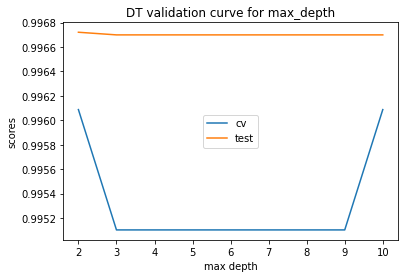

In [ ]:
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,11)

for curr_max_depth in max_depth_values:
  tree= DecisionTreeClassifier(random_state=random_state, max_depth=curr_max_depth)
  
  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))


print(test_accuracies_by_depth)
# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

In [ ]:
# Thử sử dụng GridSearchCV để khảo sát Logistic
dict_param_logistic = {
    'penalty':['l2','l1','elasticnet','none'],
    'C':[0.1, 0.2, 0.3, 0.5, 0.8, 1.],
    'l1_ratio':[0.1,0.2,0.3],
    'solver':["saga"]
}
best_tree_logistic = grid_search('logsitc', n_jobs=-1, dict_param=dict_param_logistic)


Best modelLogisticRegression(C=0.1, l1_ratio=0.1, penalty='l1', solver='saga')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


Top  feature importances
Feature  0 - 0.9754468
Feature  1 - 0.0206465
Feature  2 - 0.00030859673
Feature  3 - 0.00030859673
Feature  4 - 0.00030859673
Feature  5 - 0.00030859673
Feature  6 - 0.00030859673
Feature  7 - 0.00030859673
Feature  8 - 0.00030859673
Feature  9 - 0.00030859673
Feature  10 - 0.00030859673
Feature  11 - 0.00030859673
Feature  12 - 0.00030859673
Feature  13 - 0.00019831606
Feature  14 - 0.0001616407
Feature  15 - 0.00015214793


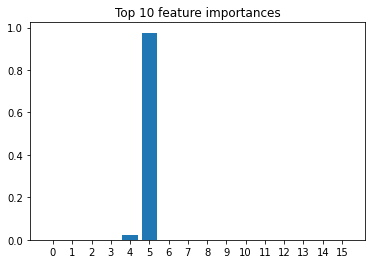

In [ ]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree_logistic.coef_.reshape(-1)
importances = np.exp(importances) / (np.exp(importances).sum())
indices = np.argsort(importances)[::-1]
print('Top  feature importances')
# print(importances,indices)
for i in range(len(indices)):

    print('Feature ', i, '-', importances[indices[i]])

# indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(indices, importances)
plt.xticks(indices, indices)
plt.show()

In [ ]:
# Thử sử dụng GridSearchCV để khảo sát
dict_param = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
best_tree = grid_search('decision-tree', n_jobs=-1, dict_param=dict_param)


Best modelDecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


Top  feature importances
Feature  0 - 0.7337697214657926
Feature  1 - 0.2659969302273954
Feature  2 - 0.00023334830681201652
Feature  3 - 0.0
Feature  4 - 0.0
Feature  5 - 0.0
Feature  6 - 0.0
Feature  7 - 0.0
Feature  8 - 0.0
Feature  9 - 0.0
Feature  10 - 0.0
Feature  11 - 0.0
Feature  12 - 0.0
Feature  13 - 0.0
Feature  14 - 0.0
Feature  15 - 0.0


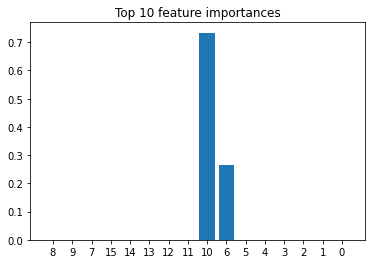

In [ ]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top  feature importances')
for i in range(len(indices)):
    print('Feature ', i, '-', importances[indices[i]])

# indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(len(indices)), importances)
plt.xticks(range(len(indices)), indices)
plt.show()

Text(0.5, 1.0, 'DT validation curve for max_depth')

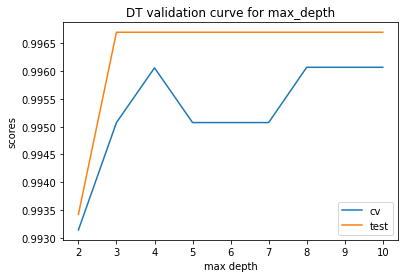

In [ ]:

# Tương tự, thử khảo sát RF với số lượng cây n_estimators
# code
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 150]
cv_accuracies_by_depth, test_accuracies_by_depth= [], []


for num_tree in num_trees:
  tree = rf=RandomForestClassifier(random_state=random_state, n_estimators=num_tree)
  
  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))

# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')



In [ ]:
# Sử dụng GridSearch CV
dict_param = {
    'max_depth': [3, 11, 15, 24, 27], 
    'min_samples_leaf': [1, 5, 7, 9, 15, 24],
    'max_features':  [3, 4, 6, 7],
    'n_estimators': [75]
}

best_forest = grid_search('random-forest', n_jobs=-1, dict_param=dict_param)


Best modelRandomForestClassifier(max_depth=11, max_features=3, min_samples_leaf=7,
                       n_estimators=75)


Top  feature importances
Feature  0 - 0.5775765625537074
Feature  1 - 0.27501937525392145
Feature  2 - 0.05540017894621871
Feature  3 - 0.036407429683601306
Feature  4 - 0.030955741280705537
Feature  5 - 0.016730092931658672
Feature  6 - 0.004861201581867647
Feature  7 - 0.003049417768319165


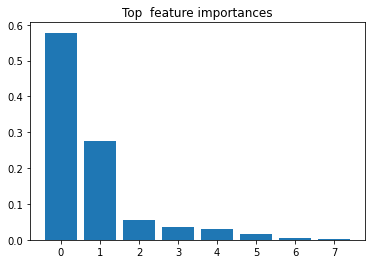

In [ ]:
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]

print('Top  feature importances')
for i in range(len(indices)):
    print('Feature ', i, '-', importances[i])

# indices = indices[:len(indices)]
plt.figure()
plt.title('Top  feature importances')
plt.bar(range(len(indices)), importances)
plt.xticks(range(len(indices)), range(len(indices)))
plt.show()

In [ ]:
# Imblanced class
'''
- Random Forest With Bootstrap Class Weighting
'''
'''
- Random Forest With Class Weighting
'''
'''
- Standard RF
'''
params = {
    'max_depth': best_forest.get_params()['max_depth'],
    'max_features': best_forest.get_params()['max_features'],
    'min_samples_leaf': best_forest.get_params()['min_samples_leaf'],
    'n_estimators': best_forest.get_params()['n_estimators'],
}
print("Standard RF")
evaluate(best_forest)

rf2 = RandomForestClassifier(max_depth=params['max_depth'], max_features=params['max_features'],
                             min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
                             class_weight='balanced_subsample')
rf2.fit(X_train, y_train)
print("Balanced_subsample RF")
evaluate(rf2)


Standard RF
Train Accuracy : 0.9992576095025983
Train f1 score : 0.9976359338061466
Train roc auc : 0.9976415094339622
Train Confusion Matrix:
[[4540    0]
 [   4  844]]
--------------------------------------------------
Test Accuracy : 0.9987261146496815
Test f1 score : 0.9947643979057591
Test roc auc : 0.9947916666666667
Test Confusion Matrix:
[[689   0]
 [  1  95]]
Balanced_subsample RF
Train Accuracy : 0.9992576095025983
Train f1 score : 0.9976359338061466
Train roc auc : 0.9976415094339622
Train Confusion Matrix:
[[4540    0]
 [   4  844]]
--------------------------------------------------
Test Accuracy : 0.9987261146496815
Test f1 score : 0.9947643979057591
Test roc auc : 0.9947916666666667
Test Confusion Matrix:
[[689   0]
 [  1  95]]


In [ ]:
# c[0][0] = gt=0 & pred=0
# c[0][1] = gt[1] & pred=1

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
gnb_sigmoid = CalibratedClassifierCV(rf2, cv='prefit', method="sigmoid")
gnb_sigmoid.fit(X_train, y_train,)
prob_pos_gnbsig = gnb_sigmoid.predict_proba(X_test)[:, 1]

In [ ]:
prob_pos_gnbsig.shape

(785,)

In [ ]:
prob_pos_gnbsig

In [ ]:
y_test